In [17]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

## Step 1: Data Exploration and Preprocessing


- [x] Load your customer dataset.


- [x] Check for missing values.
- [x] Check data types.


- [x] Handle missing values (impute or drop).
- [x] Check Duplicates
- [x] Checking Outliers


In [6]:
df=pd.read_csv("Mall_Customers.csv")

In [7]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
#shape of the data
df.shape

(200, 5)

In [8]:
# Checking Datatypes 
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
#checking description of data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Checking for missing values

In [11]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.isna().sum().sum()

0

##### No NUll Values

### Checking Duplicated

In [16]:
df.duplicated().sum()

0

##### No Duplicates

### Checking Outliers

<Axes: >

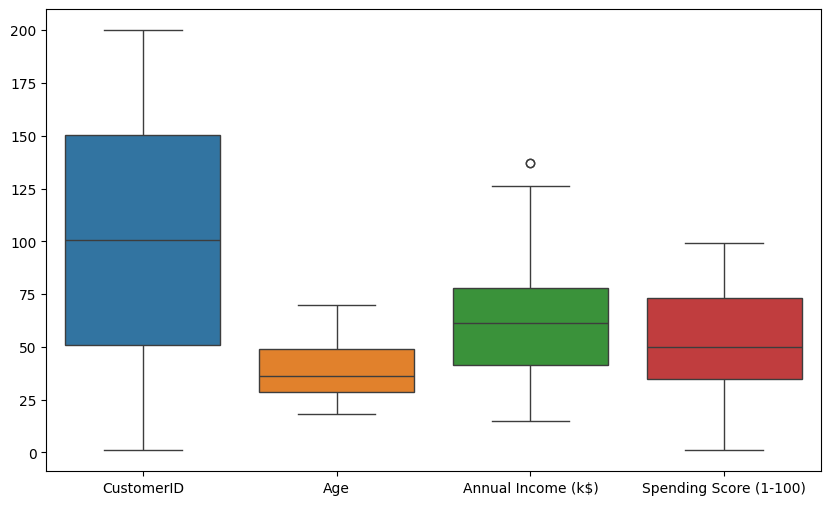

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

## Step 2: Data Visualization

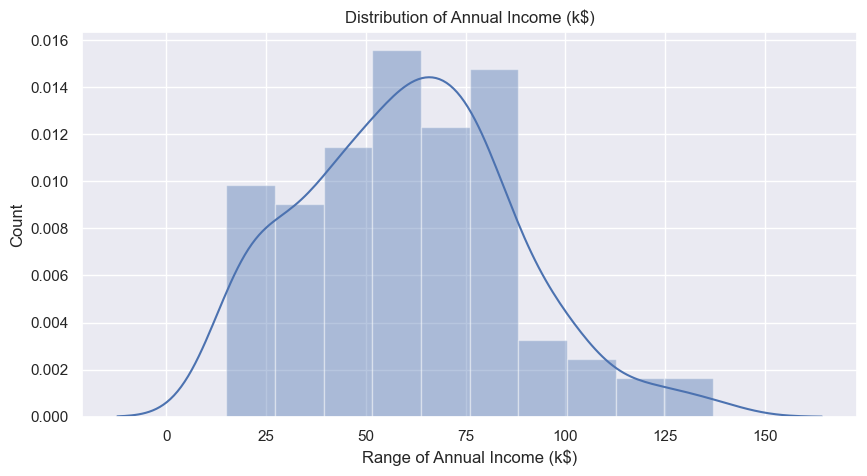

In [74]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

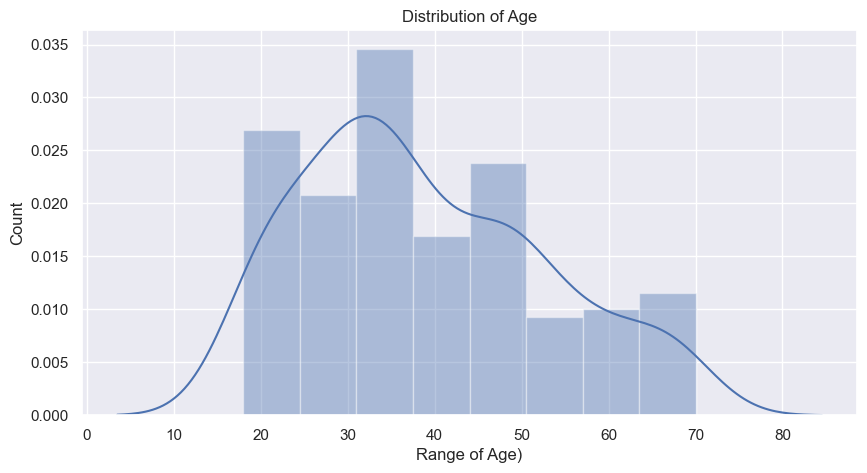

In [73]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age)')
plt.ylabel('Count')
plt.show()

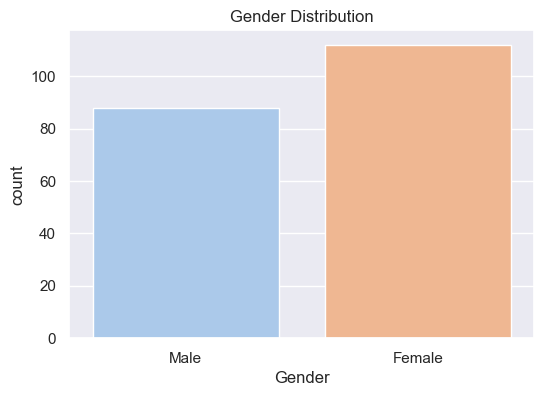

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

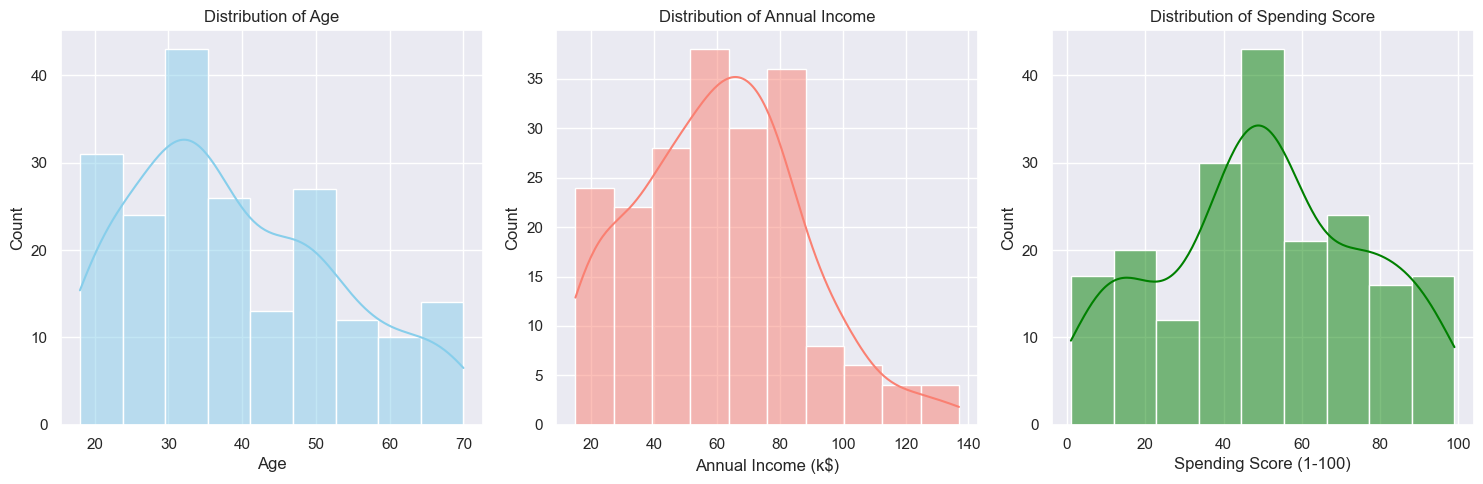

In [38]:
# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='salmon')
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

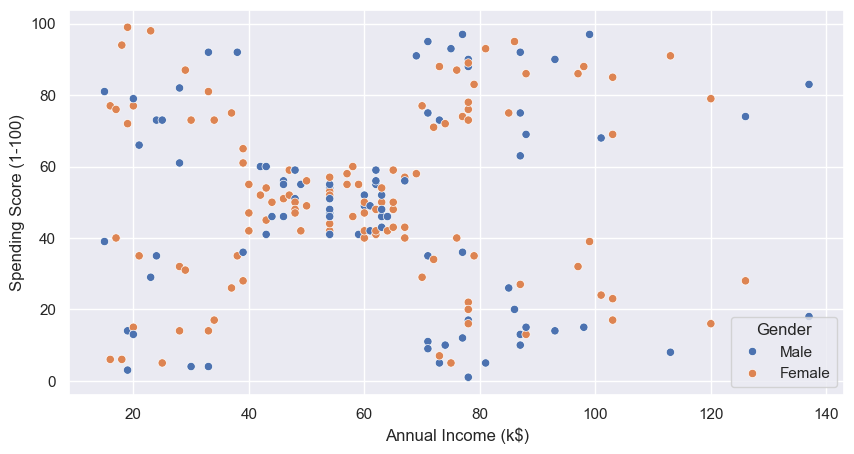

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")
plt.show()

<Figure size 1000x1500 with 0 Axes>

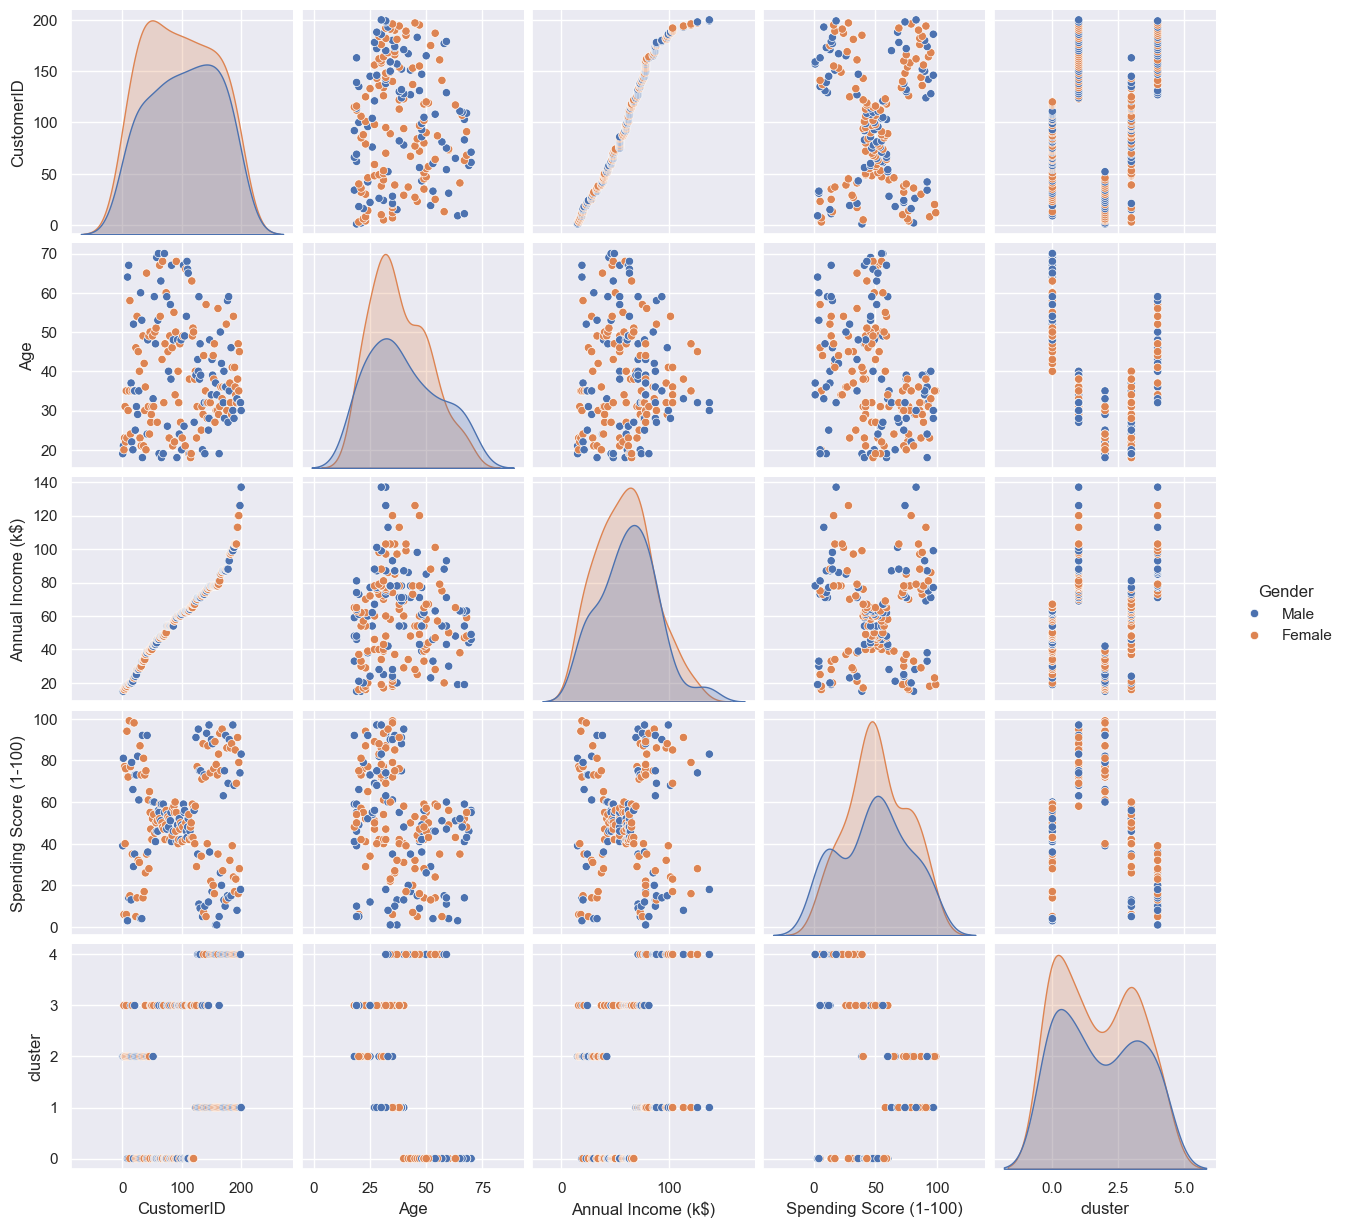

In [76]:
plt.figure(figsize=(10,15))
sns.pairplot(data=df,hue="Gender")
plt.show()

## Step 3: Preprocess the data by scaling the features

In [45]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 2:])

In [46]:
scaler

StandardScaler()

## Step 4: Select the relevant features

In [47]:
selected_features = scaled_features

In [48]:
selected_features

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## Step 5:optimal number of clusters using techniques like the elbow method and then apply k-mean clustering algorithm

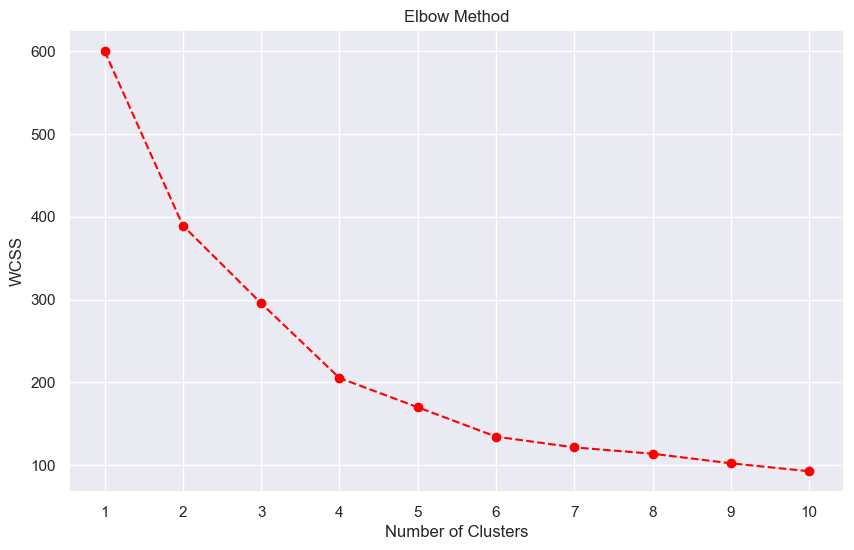

In [58]:
import numpy as np

wcss_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    wcss_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_list, marker='o', linestyle='--',c="red")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

## Step 6: Apply K-means clustering

In [49]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(selected_features)

In [63]:
kmeans.labels_

array([5, 4, 5, 4, 5, 4, 5, 4, 8, 4, 8, 4, 8, 4, 5, 4, 5, 4, 8, 4, 5, 4,
       8, 4, 8, 4, 5, 4, 5, 4, 8, 4, 8, 4, 8, 4, 5, 4, 5, 4, 0, 4, 0, 6,
       8, 4, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 3, 0, 0, 0, 3,
       6, 0, 3, 6, 0, 0, 0, 0, 0, 6, 6, 6, 3, 0, 0, 6, 0, 0, 3, 0, 0, 3,
       6, 0, 0, 3, 0, 6, 6, 3, 0, 6, 0, 3, 3, 0, 0, 6, 0, 3, 0, 0, 0, 0,
       0, 3, 6, 3, 3, 3, 0, 0, 0, 0, 6, 6, 6, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7,
       9, 7])

In [50]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


## Step 6: Visualize the resulting clusters


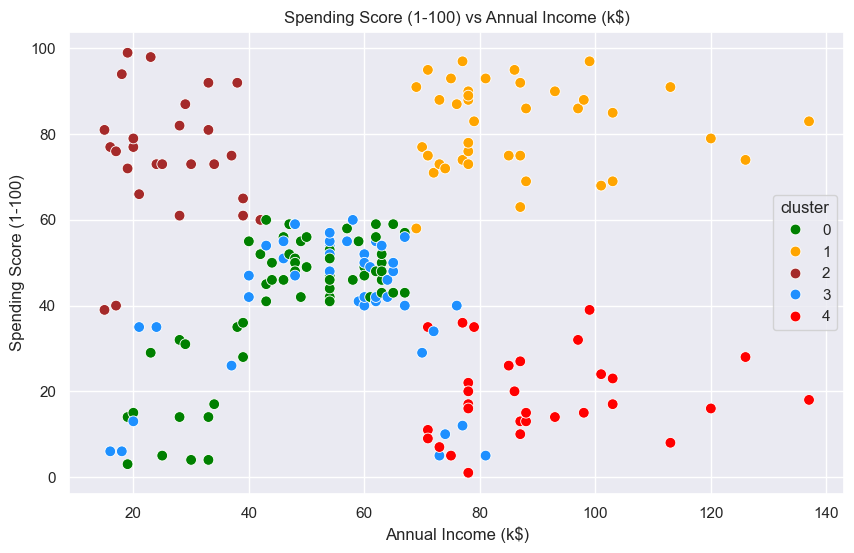

In [52]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="cluster",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

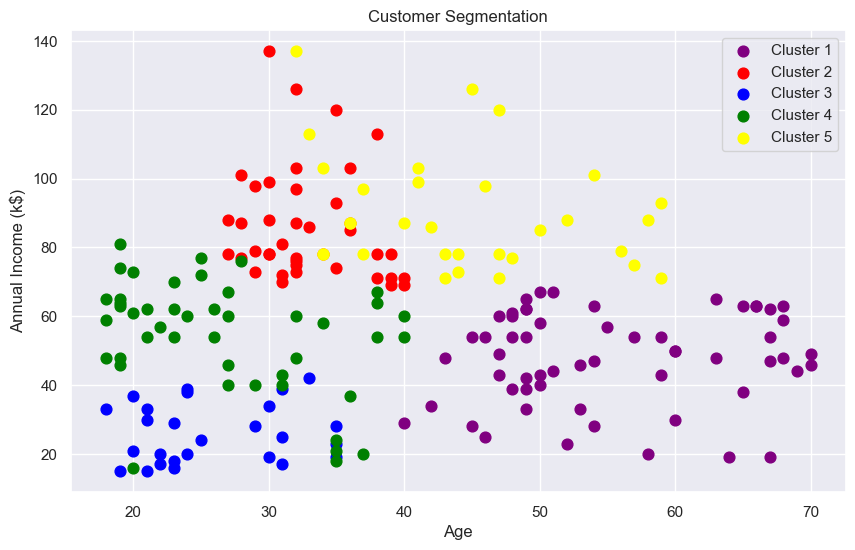

In [72]:
plt.figure(figsize=(10, 6))
colors = ['purple', 'red', 'blue', 'green', 'yellow']
for i in range(5):
    plt.scatter(df["Age"][df.cluster == i], df["Annual Income (k$)"][df.cluster == i], c=colors[i], label=f'Cluster {i+1}', s=60)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title('Customer Segmentation')
plt.legend()
plt.show()


In [61]:
for i in range(5):
    cust = df[df["cluster"]==i]
    print(f'Number of customers in {i+1}st group = {len(cust)}')
    print(f'They are - {cust["CustomerID"].values}')
    print("--------------------------------------------")


Number of customers in 1st group = 58
They are - [  9  11  13  19  23  25  27  29  31  33  35  37  41  43  45  47  51  54
  55  56  57  58  60  61  63  64  65  67  68  71  72  73  74  75  77  80
  81  83  84  86  87  90  91  93  97  99 102 103 105 107 108 109 110 111
 117 118 119 120]
--------------------------------------------
Number of customers in 2st group = 40
They are - [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]
--------------------------------------------
Number of customers in 3st group = 26
They are - [ 1  2  4  5  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44
 46 52]
--------------------------------------------
Number of customers in 4st group = 45
They are - [  3   7  15  17  21  39  48  49  50  53  59  62  66  69  70  76  78  79
  82  85  88  89  92  94  95  96  98 100 101 104 106 112 113 114 115 116
 121 122 125 133 135 139 143 145 163]
---